In [1]:
import pandas as pd

In [2]:
DATA_DIR = "../../data/raw/"
INPUT_FILE_NAME = 'cleaned_squashed.parquet'

In [3]:
df = pd.read_parquet(DATA_DIR + INPUT_FILE_NAME)
df.head()

,speaker,headline,description,duration,tags,transcript,WC,clean_transcript,clean_transcript_string,squash_tags
0,Al Gore,Averting the climate crisis,With the same humor and humanity he exuded in ...,0:16:17,"cars,alternative energy,culture,politics,scien...","0:14\r\r\rThank you so much, Chris.\rAnd it's ...",2281.0,"[thank, chris, truly, great, honor, opportunit...",thank chris truly great honor opportunity come...,"alternative energy,culture,politics,science,cl..."
1,Amy Smith,Simple designs to save a life,Fumes from indoor cooking fires kill more than...,0:15:06,"MacArthur grant,simplicity,industrial design,a...","0:11\r\r\rIn terms of invention,\rI'd like to ...",2687.0,"[term, invention, like, tell, tale, favorite, ...",term invention like tell tale favorite project...,"industrial design,alternative energy,invention..."
2,Ashraf Ghani,How to rebuild a broken state,Ashraf Ghani's passionate and powerful 10-minu...,0:18:45,"corruption,poverty,economics,investment,milita...","0:12\r\r\rA public, Dewey long ago observed,\r...",2506.0,"[public, dewey, long, ago, observe, constitute...",public dewey long ago observe constitute discu...,"poverty,economics,investment,culture,politics,..."
3,Burt Rutan,The real future of space exploration,"In this passionate talk, legendary spacecraft ...",0:19:37,"aircraft,flight,industrial design,NASA,rocket ...","0:11\r\r\rI want to start off by saying, Houst...",3092.0,"[want, start, say, houston, problem, enter, se...",want start say houston problem enter second ge...,"industrial design,invention,engineering,entrep..."
4,Chris Bangle,Great cars are great art,American designer Chris Bangle explains his ph...,0:20:04,"cars,industrial design,transportation,inventio...","0:12\r\r\rWhat I want to talk about is, as bac...",3781.0,"[want, talk, background, idea, car, art, actua...",want talk background idea car art actually mea...,"industrial design,transportation,invention,des..."


In [9]:
def print_full_dataframe(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [11]:
def compute_tag_ratio(target_column, df=df):
    tags = df[target_column].str.replace(', ',',').str.lower().str.strip()
    split_tags = tags.str.split(',')
    tag_counts_per_talk = split_tags.apply(len)

    joined_tags = tags.str.cat(sep=',').split(',')
    all_tags = pd.Series(joined_tags)

    tag_counts = all_tags.value_counts().rename_axis(target_column).reset_index(name='counts')
    tag_counts['no_count'] = len(df)-tag_counts['counts']
    tag_counts['ratio'] = tag_counts['counts']/tag_counts['no_count']
    return tag_counts

print(compute_tag_ratio('tags', df))
squashed_tag_counts = compute_tag_ratio('squash_tags', df)
print_full_dataframe(squashed_tag_counts)

               tags  counts  no_count     ratio
0        technology     695      1691  0.410999
1           science     522      1864  0.280043
2     global issues     483      1903  0.253810
3           culture     470      1916  0.245303
4            design     400      1986  0.201410
..              ...     ...       ...       ...
413           cloud       1      2385  0.000419
414          ted-ed       1      2385  0.000419
415     alzheimer's       1      2385  0.000419
416  ted en espanol       1      2385  0.000419
417  ted en español       1      2385  0.000419

[418 rows x 4 columns]
            squash_tags  counts  no_count     ratio
0            technology     695      1691  0.410999
1               science     522      1864  0.280043
2         global issues     483      1903  0.253810
3               culture     470      1916  0.245303
4                design     400      1986  0.201410
5                  tedx     398      1988  0.200201
6              business     329     

In [11]:
joined_tags = df['tags'].str.cat(sep=',').split(',')
all_tags = pd.Series(joined_tags).str.strip().str.lower()
all_tags = list(dict.fromkeys(all_tags))
try:
    all_tags.remove('')
except:
    pass
print(all_tags)
print(len(all_tags))

['cars', 'alternative energy', 'culture', 'politics', 'science', 'climate change', 'environment', 'sustainability', 'global issues', 'technology', 'macarthur grant', 'simplicity', 'industrial design', 'invention', 'engineering', 'design', 'corruption', 'poverty', 'economics', 'investment', 'military', 'policy', 'global development', 'entrepreneur', 'business', 'aircraft', 'flight', 'nasa', 'rocket science', 'transportation', 'art', 'biotech', 'oceans', 'genetics', 'dna', 'biology', 'biodiversity', 'ecology', 'computers', 'software', 'interface design', 'music', 'media', 'entertainment', 'performance', 'new york', 'memory', 'interview', 'death', 'architecture', 'disaster relief', 'cities', 'urban planning', 'collaboration', 'robots', 'education', 'innovation', 'social change', 'obesity', 'disease', 'health', 'health care', 'food', 'primates', 'africa', 'animals', 'nature', 'wunderkind', 'cancer', 'creativity', 'love', 'gender', 'relationships', 'cognitive science', 'psychology', 'evolut

In [12]:
def create_one_hot_encode(df=df):
    complete_transcripts_tags = []
    for rows, value in df.iterrows():
        one_hot_encoding = [0] * len(all_tags)
        transcript = [value['clean_transcript_string']]
        indiv_tags = value['tags'].split(',')
        for tags in indiv_tags:
            if tags == '':
                continue
            index = all_tags.index(tags.lower().lstrip(' '))
            one_hot_encoding[index] = 1
        indiv_transcript_tags = transcript + one_hot_encoding
        complete_transcripts_tags.append(indiv_transcript_tags)
    return pd.DataFrame(complete_transcripts_tags, columns=['transcript'] + all_tags)
print(len(df))

2386


In [13]:
ted_tags = create_one_hot_encode()
ted_tags

,transcript,cars,alternative energy,culture,politics,science,climate change,environment,sustainability,global issues,...,anthropocene,syria,movies,ted residency,ted-ed,telescopes,ted en espanol,alzheimer's,ted en español,epidemiology
0,thank chris truly great honor opportunity come...,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,term invention like tell tale favorite project...,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,public dewey long ago observe constitute discu...,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,want start say houston problem enter second ge...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,want talk background idea car art actually mea...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,imagine walk even discover everybody room look...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2382,pay close attention easy attention pull differ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2383,happy pic take senior college right dance prac...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2384,sevenyearold grandson sleep hall wake lot morn...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
single_class = ted_tags[['transcript', 'technology']]
single_class

,transcript,technology
0,thank chris truly great honor opportunity come...,1
1,term invention like tell tale favorite project...,0
2,public dewey long ago observe constitute discu...,0
3,want start say houston problem enter second ge...,0
4,want talk background idea car art actually mea...,1
...,...,...
2381,imagine walk even discover everybody room look...,0
2382,pay close attention easy attention pull differ...,1
2383,happy pic take senior college right dance prac...,0
2384,sevenyearold grandson sleep hall wake lot morn...,0


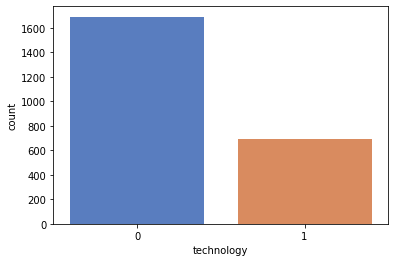

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
#breakdown by class
sns.countplot(x="technology", data=single_class, palette="muted");

In [19]:
single_class.dtypes

transcript    object
technology     int64
dtype: object

In [23]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas,numpy, string #textblob, string#,# xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [24]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(single_class['transcript'], single_class['technology'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [27]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(single_class['transcript'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [28]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(single_class['transcript'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(single_class['transcript'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(single_class['transcript'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [30]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y), classifier

In [33]:
# Naive Bayes on Count Vectors
accuracy, classifier_count = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: {}".format(accuracy))

# Naive Bayes on Word Level TF IDF Vectors
accuracy, classifier_word_tfidf = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: {}".format(accuracy))

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy, classifier_ngram_tfidf = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: {}".format(accuracy))

# Naive Bayes on Character Level TF IDF Vectors
accuracy, classifier_charlevel_tfidf = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: {}".format(accuracy))

NB, Count Vectors: 0.7772194304857621
NB, WordLevel TF-IDF: 0.7554438860971524
NB, N-Gram Vectors: 0.711892797319933
NB, CharLevel Vectors: 0.6867671691792295


In [34]:
print(valid_x)

1149    lucky person privilege beautiful earth people ...
1501    democracy trouble question come deep dilemma e...
954     know million cellular radio mast deploy worldw...
2325    couple year produce dead mall series short fil...
661     want talk penguin today want start say need ne...
                              ...                        
620     illegal wildlife trade brazil major threat fau...
1100    extraordinary honor spend time jail prison dea...
863     idea stuxnet worm actually simple want iran bo...
2305    tell time race race contemporary way understan...
96      rachel carson silent spring think people like ...
Name: transcript, Length: 597, dtype: object


In [36]:
print(valid_y)
print(len(valid_y))

[0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 1 

In [48]:
df_predict = pd.DataFrame()
print(classifier_count.predict(valid_x))
df_predict['transcript'] = valid_x
df_predict['technology'] = valid_y
df_predict = df_predict.sort_index()
print(df_predict)
check = df_predict.join(single_class, lsuffix='_caller', rsuffix='_other')
print(check)

ValueError: could not convert string to float: 'lucky person privilege beautiful earth people creature live passion inspire age seven parent take morocco edge sahara desert imagine little brit cold damp like home amaze experience want explore filmmaker end earth try perfect shoot capture animal behavior see lucky share million people worldwide idea new perspective planet actually able message get bed day spring step think hard new story new subject new technology change way film enable fresh new image tell brand new story nature great event series bbc david attenborough want image grizzly bear pretty familiar time think life hardly film go alaska grizzly rely high inaccessible mountain slope denning way film shoot air video david attenborough alaska british columbia thousand bear family emerge winter sleep eat condition ideal hibernation lot snow dig den food mother lead cub coast snow melt get challenge small cub mountain dangerous place ultimately fate bear family bear north pacific depend salmon kb love shoot goosebump time film helicopter gyrostabilized camera wonderful bite gear like fly tripod crane dolly roll technology money shoot right place right time sequence especially difficult year get follow year way remote part alaska hang helicopter week eventually get lucky cloud lift wind bear show manage magic moment filmmaker new technology amaze tool thing excite new specie discover hear animal know series untamed america national geographic new specie bat discover cloud forest ecuador amaze discovery solve mystery pollinate unique flower depend solely bat series air think video narrator tubelipped nectar bat pool delicious nectar lie flower long flute reach necessity mother evolution music twoandahalfinch bat threeandahalfinch tongue long relative body length mammal world human ninefoot tongue kb tongue film cut tiny little hole base flower camera slow action time imagine quick thing real life people ask favorite place planet truth wonderful place location draw time time remote location go backpacker time film recently untamed america altiplano high andes south america otherworldly place know foot tough freeze cold air get hard breathe especially carry heavy film equipment pound head feel like constant hangover advantage wonderful atmosphere enable star heaven amaze clarity look video narrator mile south tropic chile bolivia andes completely change call altiplano high plain place extreme extreme contrast desert freeze water boil like mar earth hostile life star foot dry air make perfect stargaze world astronomer telescope nearby look naked eye need music kb thank let share image magnificent wonderful earth thank let share'

In [47]:
pd.set_option('display.max_rows', None)
import numpy as np
check['same'] = np.where((df['technology_caller'] == df['technology_other']) , df['one'], np.nan)
check

NameError: name 'np' is not defined